# Antarctica: EDA

Goal of this notebook is to explore basic descriptive statistics about the original probes data. The expectation is the probe locations are distributed randomly. 

# Setup

In [1]:
import random
from typing import Mapping, NamedTuple, Sequence

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import patches as patches
from matplotlib import pyplot as plt
from pandas import DataFrame
from tqdm import tqdm

import antarctica as aa

In [2]:
sns.set_style("whitegrid")

# Dataset

First, we read and prep the raw data.

In [3]:
probes = aa.create_probes("data/probes.csv")
probes.head()

,x,y,distance_expected,distance_expected_err
probe_id,,,,
0,0.472751,1.302734,0.428625,0.021431
1,5.944659,11.519452,2.392850,0.119642
2,12.623399,15.411657,1.264116,0.063206
3,8.340580,3.964348,2.261914,0.113096
4,9.833046,14.837630,2.668234,0.133412


# Count

In [4]:
n = len(probes)
n

50

## Summary

There are 50 probes total.

# Coordinates

## X and Y Distributions

Text(0.5, 1.0, 'Y')

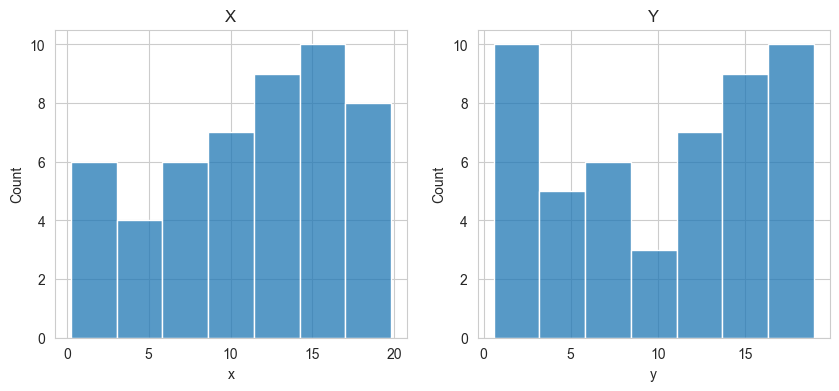

In [5]:
# Independent distributions
_, axs = plt.subplots(ncols=2, figsize=(10,4))

sns.histplot(data=probes, x="x", ax=axs[0])
axs[0].set_title("X")

sns.histplot(data=probes, x="y", ax=axs[1])
axs[1].set_title("Y")

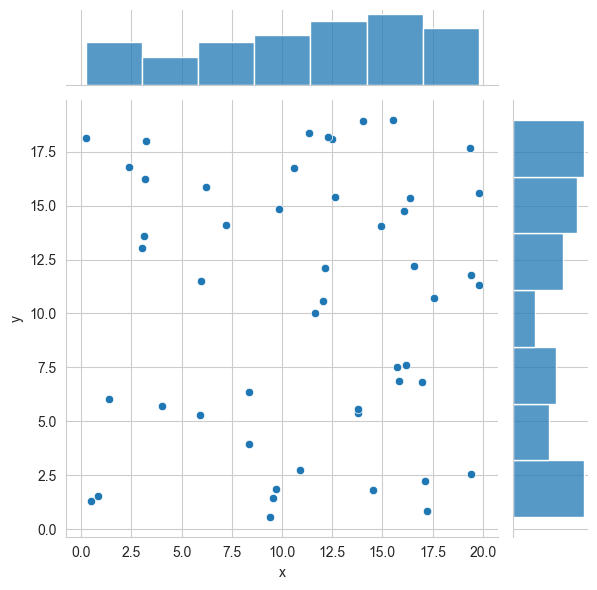

In [6]:
# Joint distribution
sns.jointplot(data=probes, x="x", y="y")

Text(0.5, 0, 'Vector Length')

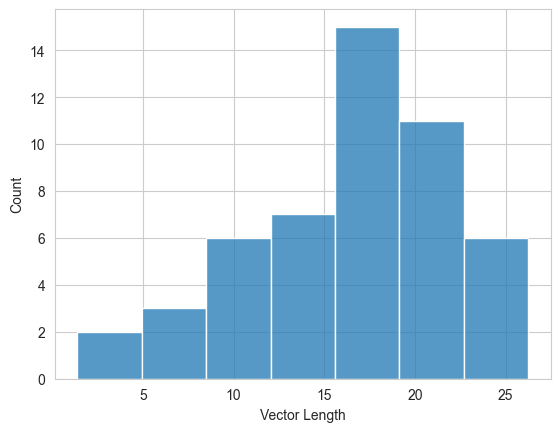

In [7]:
# Vector length
df = np.sqrt(probes.x**2 + probes.y**2)
sns.histplot(x=df)
plt.gca().set_xlabel("Vector Length")

## Summary

No obvious patterns in the coordinates. Probe locations appear to be fairly random which matches our expectation.

# Expected Distance

<Axes: xlabel='distance_expected', ylabel='Count'>

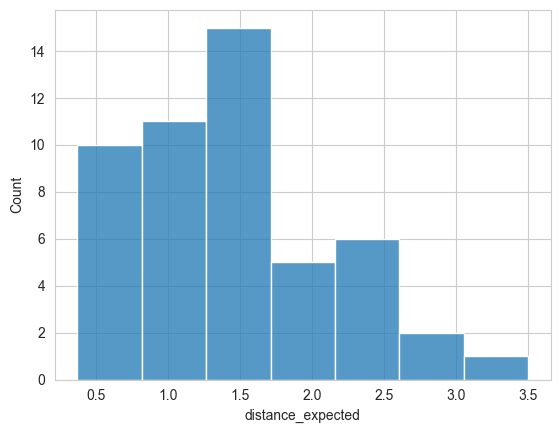

In [8]:
sns.histplot(data=probes, x="distance_expected")

<Axes: xlabel='distance_expected_err', ylabel='Count'>

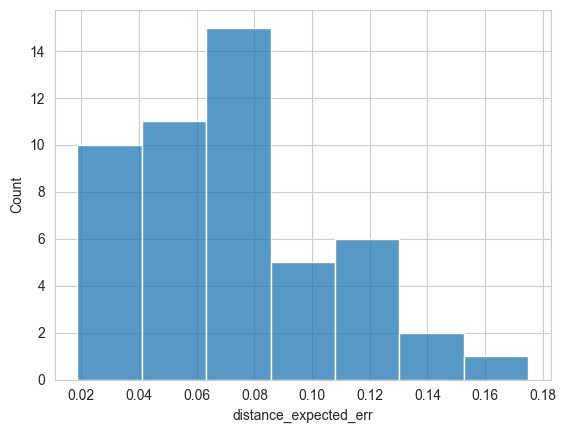

In [9]:
sns.histplot(data=probes, x="distance_expected_err")

The fact that these distributions are identical suggests the distance error is a function of distance. 

In [10]:
probes.distance_expected_err / probes.distance_expected

probe_id
0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
30    0.05
31    0.05
32    0.05
33    0.05
34    0.05
35    0.05
36    0.05
37    0.05
38    0.05
39    0.05
40    0.05
41    0.05
42    0.05
43    0.05
44    0.05
45    0.05
46    0.05
47    0.05
48    0.05
49    0.05
dtype: float64

## Summary

The expected distance error is 5% of the expected distance. This suggests that we should consider normalizing the distance errors since we should expect the locations to be less precise when 2 probes are further away from each other.